# Guía 4

## Ejercicio 2

Genere:

a) una señal senoidal discreta de frecuencia 2 Hz,

b) una señal cuadrada periódica de frecuencia 2 Hz, y

c) una señal senoidal de frecuencia 4 Hz.

Para todas ellas utilice fase cero, una frecuencia de muestreo de 100 Hz, y una duración total de 1 segundo. Con estas señales realice las siguientes operaciones:

1- Verifique si son ortogonales las señales (a) y (b), (a) y (c), y (b) y (c).

2- Calcule la TDF de las tres señales, y verifique la ortogonalidad de los pares como en el ejercicio anterior, en este dominio transformado.

3- Redefina la señal (c) como una senoidal pero de frecuencia 3.5 Hz. Verifique si es ortogonal respecto a la señal (a) en ambos dominios.

### Solución

Text(0, -0.5, '$\\langle a, b \\rangle = 63.5782$\n$\\langle a, c \\rangle = -0.0000$ (ortogonal)\n$\\langle b, c \\rangle = -0.0000$ (ortogonal)')

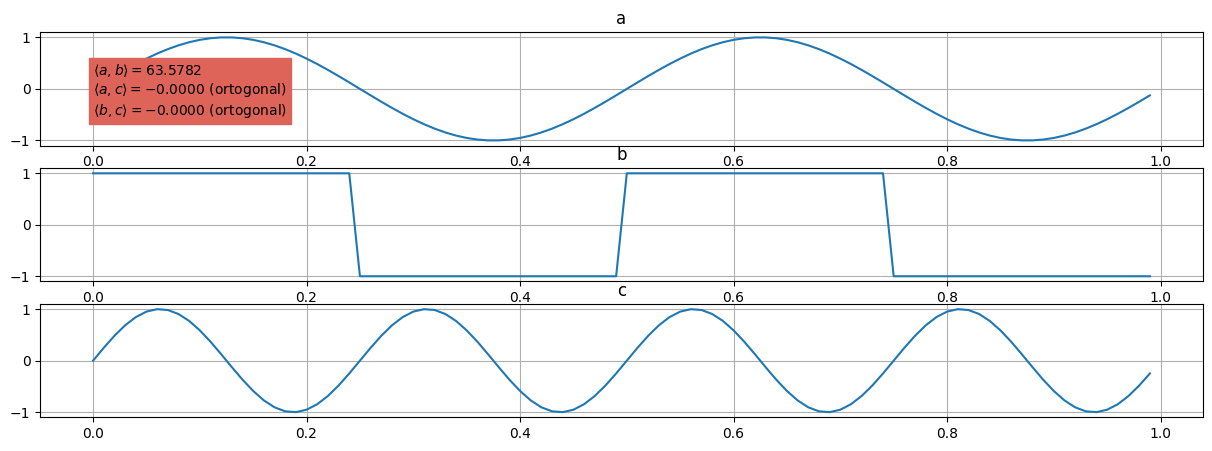

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def productoInterno(a,b):
    return np.sum(np.multiply(a,np.conjugate(b)))

def fourier(x):
    N = len(x)
    coefs = np.zeros(N, dtype=complex)  # vector de coeficientes
    aux1 = -2.0*np.pi/N                 # precalculamos valores que se repiten
    for k in range(N):
        aux2 = aux1*k                   # precalculamos (otros) valores que se repiten
        for n in range(N):
            coefs[k] += x[n]*np.exp(1j*aux2*n)
    return coefs

def senoidal(t,fs,fase=0):
    return np.sin(2*np.pi*fs*t+fase)

def cuadrada(t, fs, fase=0):
    # precalcular modulos 2 * np.pi * fs * t + fase%(2pi)
    val = np.mod(2 * np.pi * fs * t + fase, 2 * np.pi)
    # retornar valores condicionados mod >= pi -> -1 
    return np.where(np.greater_equal(val, np.pi), -1, 1)

# Parametros
Tini = 0
Tfin = 1
fm = 100

# Generar seniales
t = np.linspace(Tini, Tfin, int(fm*(Tfin-Tini)), endpoint=False)
a = senoidal(t,2)
b = cuadrada(t,2)
c = senoidal(t,4)

# Calcular producto interno para verificar ortogonalidad
prod_ab = productoInterno(a,b)
prod_ac = productoInterno(a,c)
prod_bc = productoInterno(b,c)

# Graficas
fig, ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(15)
for x in ax:
    x.grid()

ax[0].plot(t,a)
ax[0].set_title('a')
ax[1].plot(t,b)
ax[1].set_title('b')
ax[2].plot(t,c)
ax[2].set_title('c')

# Texto
txt  = "$\\langle a, b \\rangle = %.4f$\n" % prod_ab
txt += "$\\langle a, c \\rangle = %.4f$ (ortogonal)\n" % prod_ac
txt += "$\\langle b, c \\rangle = %.4f$ (ortogonal)"   % prod_bc
ax[0].text(0, -0.5, txt,
    fontsize=10,
    transform=ax[0].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

2- Calcule la TDF de las tres señales, y verifique la ortogonalidad de los pares como en el ejercicio anterior, en este dominio transformado.

Text(-40, 20, '$\\langle A, B \\rangle = (6357.8179, -0.0000)$\n$\\langle A, C \\rangle = (0.0000, 0.0000)$ (ortogonal)\n$\\langle B, C \\rangle = (0.0000, -0.0000)$ (ortogonal)')

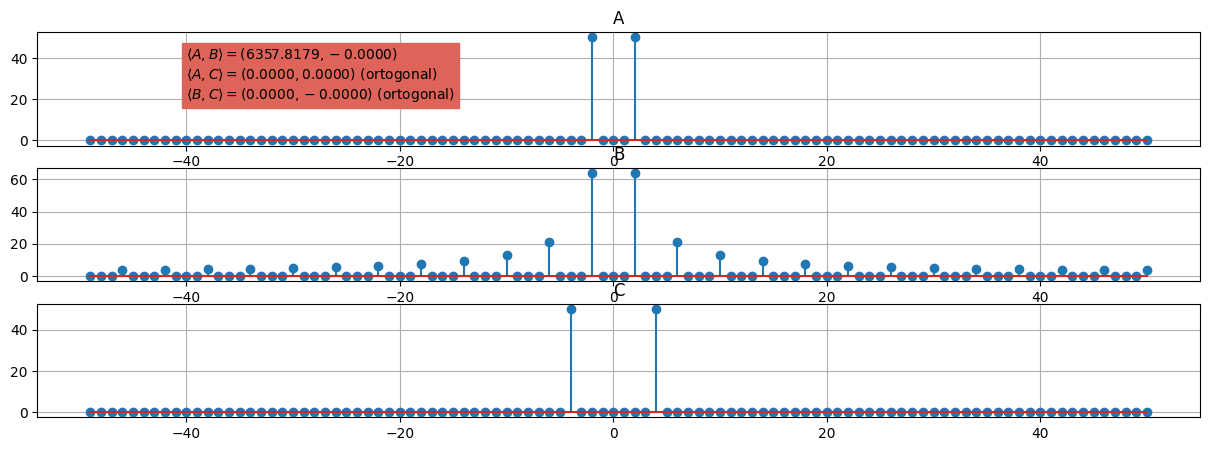

In [2]:
# Calcular TDF
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
A = fourier(a)
B = fourier(b)
C = fourier(c)

# Calcular producto interno para verificar ortogonalidad
prod_AB = productoInterno(A,B)
prod_AC = productoInterno(A,C)
prod_BC = productoInterno(B,C)

# Graficas
fig, ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(15)
for x in ax:
    x.grid()

ax[0].stem(f,np.abs(A))
ax[0].set_title('A')
ax[1].stem(f,np.abs(B))
ax[1].set_title('B')
ax[2].stem(f,np.abs(C))
ax[2].set_title('C')

# Texto
txt  = "$\\langle A, B \\rangle = (%.4f, " % prod_AB.real + "%.4f)$\n" % prod_AB.imag
txt += "$\\langle A, C \\rangle = (%.4f, " % prod_AC.real + "%.4f)$ (ortogonal)\n" % prod_AC.imag
txt += "$\\langle B, C \\rangle = (%.4f, " % prod_BC.real + "%.4f)$ (ortogonal)" % prod_BC.imag
ax[0].text(-40, 20, txt,
    fontsize=10,
    transform=ax[0].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

3- Redefina la señal (c) como una senoidal pero de frecuencia 3.5 Hz. Verifique si es ortogonal respecto a la señal (a) en ambos dominios.

Text(-60, 60, '$\\langle A, B \\rangle = (6357.8179, -0.0000)$\n$\\langle A, C \\rangle = (-0.0000, 0.0000)$ (ortogonal)\n$\\langle B, C \\rangle = (41.4214, -0.0000)$')

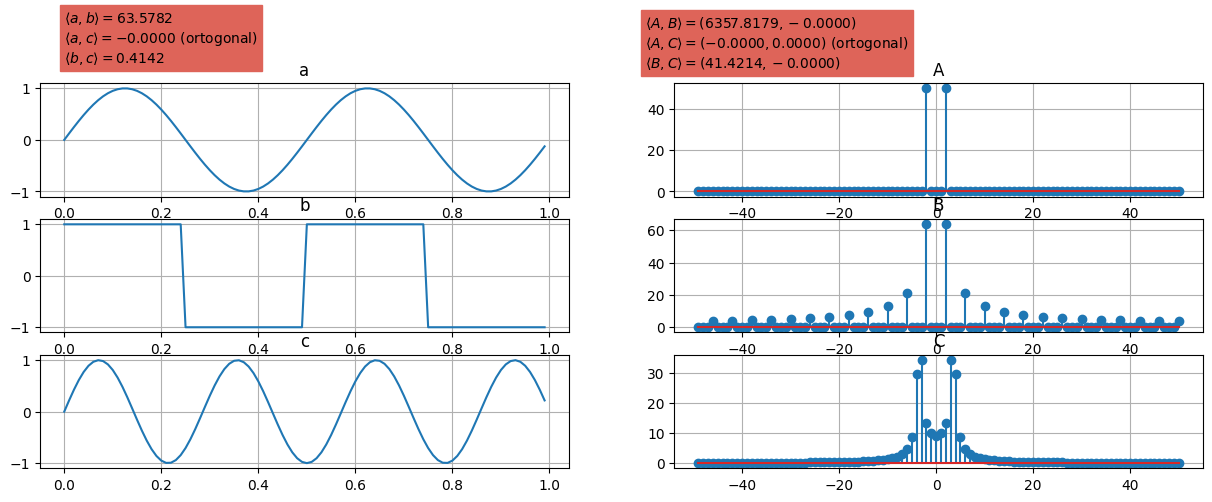

In [3]:
# Redefinir c
c = senoidal(t,3.5)

# Calcular producto interno para verificar ortogonalidad
prod_ac = productoInterno(a,c)
prod_bc = productoInterno(b,c)

# Calcular TDF
C = fourier(c)

# Calcular producto interno para verificar ortogonalidad
prod_AC = productoInterno(A,C)
prod_BC = productoInterno(B,C)

# Graficas
fig, ax = plt.subplots(3,2)
fig.set_figheight(5)
fig.set_figwidth(15)
for x1 in ax:
    for x2 in x1:
        x2.grid()

ax[0][0].plot(t,a)
ax[0][0].set_title('a')
ax[1][0].plot(t,b)
ax[1][0].set_title('b')
ax[2][0].plot(t,c)
ax[2][0].set_title('c')

# Texto
txt  = "$\\langle a, b \\rangle = %.4f$\n" % prod_ab
txt += "$\\langle a, c \\rangle = %.4f$ (ortogonal)\n" % prod_ac
txt += "$\\langle b, c \\rangle = %.4f$"   % prod_bc
ax[0][1].text(0, 1.5, txt,
    fontsize=10,
    transform=ax[0][0].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[0][1].stem(f,np.abs(A))
ax[0][1].set_title('A')
ax[1][1].stem(f,np.abs(B))
ax[1][1].set_title('B')
ax[2][1].stem(f,np.abs(C))
ax[2][1].set_title('C')

# Texto
txt  = "$\\langle A, B \\rangle = (%.4f, " % prod_AB.real + "%.4f)$\n" % prod_AB.imag
txt += "$\\langle A, C \\rangle = (%.4f, " % prod_AC.real + "%.4f)$ (ortogonal)\n" % prod_AC.imag
txt += "$\\langle B, C \\rangle = (%.4f, " % prod_BC.real + "%.4f)$" % prod_BC.imag
ax[0][1].text(-60, 60, txt,
    fontsize=10,
    transform=ax[0][1].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))